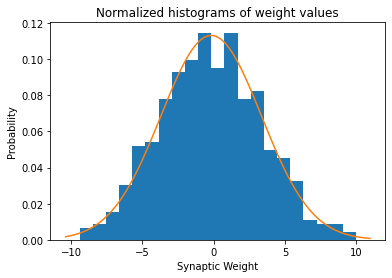

In [17]:
# Weight distribution of Hebbian synapses in rate model

%matplotlib inline
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

nn = 500 # number of nodes
npat = 1000 # number of patterns

# Random pattern; firing rates are exponential distributed

ar = 40 # average firing rate of pattern
rPre = -ar*np.log(np.random.rand(nn,npat)) # exponential distr. pre rates
rPost = -ar*np.log(np.random.rand(1,npat)) # exponential distr. post rate

# Weight matrix

w = np.dot((rPost-ar),np.transpose(rPre-ar)) # Hebbian covariance rule
w = w/np.sqrt(npat) # standard scaling to keep variance constant
w = np.transpose(w)
w = w/nn

# Histogram plotting and fitting a gaussian

mean,std=norm.fit(w)
fig, ax = plt.subplots()
ax.hist(w, bins=21, density="true")
ax.set_title("Normalized histograms of weight values")
ax.set_xlabel("Synaptic Weight")
ax.set_ylabel("Probability")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

plt.show()

